# Import of required libraries 

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
%matplotlib inline
from sklearn.metrics import accuracy_score, roc_auc_score, roc_curve, confusion_matrix, auc
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
from sklearn.tree import DecisionTreeClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.naive_bayes import GaussianNB
from sklearn.ensemble import RandomForestClassifier
from sklearn.neighbors import KNeighborsClassifier
from sklearn.neural_network import MLPClassifier
from sklearn.compose import ColumnTransformer
from imblearn.over_sampling import RandomOverSampler
import warnings
warnings.filterwarnings("ignore")

In [2]:

from collections import Counter

# Load of Dataset

In [3]:
train_data = pd.read_csv("exoTrain.csv") 
test_data=pd.read_csv('exoTest.csv')
train_data.head()

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54


So, it's clearly seems it contains 3197 Flux Values and 1 column for Label

Reading the description I found : 
*"Each star has a binary label of 2 or 1. 2 indicated that that the star is confirmed to have at least one exoplanet in orbit; some observations are in fact multi-planet systems"
*

In [4]:
train_data['LABEL'].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [5]:
train_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 5087 entries, 0 to 5086
Columns: 3198 entries, LABEL to FLUX.3197
dtypes: float64(3197), int64(1)
memory usage: 124.1 MB


In [6]:
train_data["LABEL"].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [7]:
train_data[train_data["LABEL"]==2]

,LABEL,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,2,93.85,83.81,20.10,-26.98,-39.56,-124.71,-135.18,-96.27,-79.89,...,-78.07,-102.15,-102.15,25.13,48.57,92.54,39.32,61.42,5.08,-39.54
1,2,-38.88,-33.83,-58.54,-40.09,-79.31,-72.81,-86.55,-85.33,-83.97,...,-3.28,-32.21,-32.21,-24.89,-4.86,0.76,-11.70,6.46,16.00,19.93
2,2,532.64,535.92,513.73,496.92,456.45,466.00,464.50,486.39,436.56,...,-71.69,13.31,13.31,-29.89,-20.88,5.06,-11.80,-28.91,-70.02,-96.67
3,2,326.52,347.39,302.35,298.13,317.74,312.70,322.33,311.31,312.42,...,5.71,-3.73,-3.73,30.05,20.03,-12.67,-8.77,-17.31,-17.35,13.98
4,2,-1107.21,-1112.59,-1118.95,-1095.10,-1057.55,-1034.48,-998.34,-1022.71,-989.57,...,-594.37,-401.66,-401.66,-357.24,-443.76,-438.54,-399.71,-384.65,-411.79,-510.54
5,2,211.10,163.57,179.16,187.82,188.46,168.13,203.46,178.65,166.49,...,-98.45,30.34,30.34,29.62,28.80,19.27,-43.90,-41.63,-52.90,-16.16
6,2,9.34,49.96,33.30,9.63,37.64,20.85,4.54,22.42,10.11,...,-58.56,9.93,9.93,23.50,5.28,-0.44,10.90,-11.77,-9.25,-36.69
7,2,238.77,262.16,277.80,190.16,180.98,123.27,103.95,50.70,59.91,...,-72.48,31.77,31.77,53.48,27.88,95.30,48.86,-10.62,-112.02,-229.92
8,2,-103.54,-118.97,-108.93,-72.25,-61.46,-50.16,-20.61,-12.44,1.48,...,43.92,7.24,7.24,-7.45,-18.82,4.53,21.95,26.94,34.08,44.65
9,2,-265.91,-318.59,-335.66,-450.47,-453.09,-561.47,-606.03,-712.72,-685.97,...,3671.03,2249.28,2249.28,2437.78,2584.22,3162.53,3398.28,3648.34,3671.97,3781.91


In [8]:
nulls = train_data.isnull().sum()
nulls[nulls > 0]

Series([], dtype: int64)

So, No Null values :)

<AxesSubplot:>

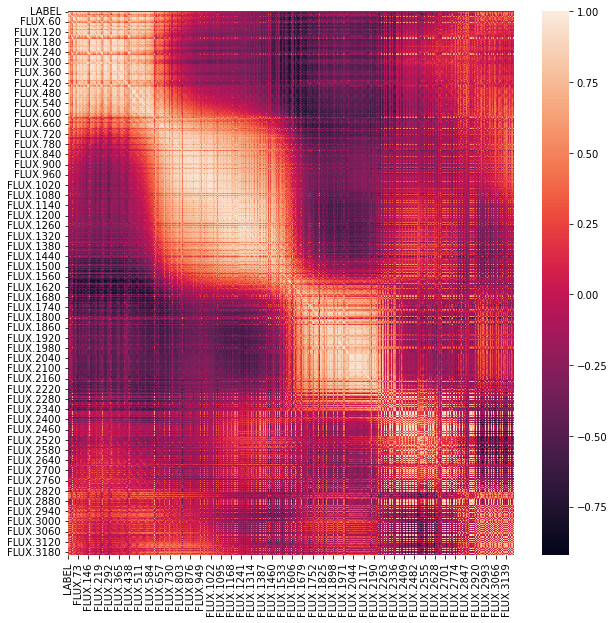

In [13]:
plt.figure(figsize=(10,10))
sns.heatmap(train_data.corr())

# Split in datasets

In [15]:
x_train_ns=train_data.drop('LABEL',axis=1)
y_train_ns=train_data[['LABEL']]

In [20]:
x_test=test_data.drop('LABEL',axis=1)
y_test=test_data[['LABEL']]

In [21]:
def mean_normalise(series):
  series = pd.Series(series)
  return (series - series.mean())/(series.max() - series.min())

x_train_ns = x_train_ns.apply(mean_normalise, axis = 1)
x_test = x_test.apply(mean_normalise, axis = 1)

In [22]:
def fast_fourier_transformation(series):
  series = np.fft.fft(series, len(series))
  return np.abs(series)

x_train_ns = x_train_ns.T.apply(fast_fourier_transformation, axis = 0).T
x_test = x_test.T.apply(fast_fourier_transformation, axis = 0).T

In [23]:
from imblearn.over_sampling import SMOTE

smote = SMOTE()
x_train_ns, y_train_ns = smote.fit_resample(x_train_ns, y_train_ns)
print(x_train_ns)
print(y_train_ns)

             FLUX.1      FLUX.2     FLUX.3      FLUX.4      FLUX.5  \
0      6.620116e-14    2.273248  35.722883   33.978236  128.816503   
1      4.821195e-14   30.299298  36.918808   38.376852   22.149931   
2      1.291464e-13   66.809870  19.498262  170.268810   48.413391   
3      2.498890e-14   19.369720  52.151962  108.097894  100.659024   
4      6.706859e-14  113.576655  51.382781  146.597215  148.627668   
...             ...         ...        ...         ...         ...   
10095  8.630318e-15    5.366483  25.442787   11.956983   11.865401   
10096  4.626797e-14   23.797115  49.039351   42.027876   21.250288   
10097  8.233334e-15    5.783164  28.264809   30.664269   11.391856   
10098  2.306478e-14   17.086024  18.692899   11.580450    8.449920   
10099  3.730276e-14    5.937941  61.649912   47.472448   35.772327   

           FLUX.6      FLUX.7     FLUX.8     FLUX.9    FLUX.10  ...  \
0       18.835061   16.101795  10.722037  18.488302  16.400976  ...   
1       33.282191

In [24]:
train_data["LABEL"].value_counts()

1    5050
2      37
Name: LABEL, dtype: int64

In [25]:
x_train_ns

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,6.620116e-14,2.273248,35.722883,33.978236,128.816503,18.835061,16.101795,10.722037,18.488302,16.400976,...,1.920231,16.400976,18.488302,10.722037,16.101795,18.835061,128.816503,33.978236,35.722883,2.273248
1,4.821195e-14,30.299298,36.918808,38.376852,22.149931,33.282191,27.734204,11.862346,14.001221,14.221386,...,11.833992,14.221386,14.001221,11.862346,27.734204,33.282191,22.149931,38.376852,36.918808,30.299298
2,1.291464e-13,66.809870,19.498262,170.268810,48.413391,88.178733,57.407061,38.684283,10.503268,46.482585,...,22.681374,46.482585,10.503268,38.684283,57.407061,88.178733,48.413391,170.268810,19.498262,66.809870
3,2.498890e-14,19.369720,52.151962,108.097894,100.659024,269.416639,77.435861,71.256558,54.895479,33.335462,...,26.711804,33.335462,54.895479,71.256558,77.435861,269.416639,100.659024,108.097894,52.151962,19.369720
4,6.706859e-14,113.576655,51.382781,146.597215,148.627668,103.842855,116.738548,28.957862,36.451207,69.375686,...,4.923027,69.375686,36.451207,28.957862,116.738548,103.842855,148.627668,146.597215,51.382781,113.576655
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10095,8.630318e-15,5.366483,25.442787,11.956983,11.865401,5.471536,10.090648,15.433164,6.493449,8.708560,...,6.949253,8.708560,6.493449,15.433164,10.090648,5.471536,11.865401,11.956983,25.442787,5.366483
10096,4.626797e-14,23.797115,49.039351,42.027876,21.250288,37.550648,39.842943,24.006789,21.225056,11.271884,...,13.395342,11.271884,21.225056,24.006789,39.842943,37.550648,21.250288,42.027876,49.039351,23.797115
10097,8.233334e-15,5.783164,28.264809,30.664269,11.391856,20.752144,13.713190,14.700361,12.826808,5.703807,...,7.005688,5.703807,12.826808,14.700361,13.713190,20.752144,11.391856,30.664269,28.264809,5.783164
10098,2.306478e-14,17.086024,18.692899,11.580450,8.449920,13.474000,13.469264,13.293235,7.753841,6.858553,...,6.401914,6.858553,7.753841,13.293235,13.469264,13.474000,8.449920,11.580450,18.692899,17.086024


In [26]:
x_test

,FLUX.1,FLUX.2,FLUX.3,FLUX.4,FLUX.5,FLUX.6,FLUX.7,FLUX.8,FLUX.9,FLUX.10,...,FLUX.3188,FLUX.3189,FLUX.3190,FLUX.3191,FLUX.3192,FLUX.3193,FLUX.3194,FLUX.3195,FLUX.3196,FLUX.3197
0,5.126298e-15,23.184733,40.545472,17.994173,13.772498,16.594294,17.532422,8.094149,8.045917,9.549431,...,7.981027,9.549431,8.045917,8.094149,17.532422,16.594294,13.772498,17.994173,40.545472,23.184733
1,3.980211e-14,135.637702,42.680618,28.017660,17.672923,16.099550,62.999485,27.005547,26.735149,29.708628,...,9.883983,29.708628,26.735149,27.005547,62.999485,16.099550,17.672923,28.017660,42.680618,135.637702
2,2.581991e-14,101.624620,26.553454,11.634754,11.720122,46.153088,23.677302,22.208643,14.393021,3.278532,...,7.742408,3.278532,14.393021,22.208643,23.677302,46.153088,11.720122,11.634754,26.553454,101.624620
3,4.574132e-14,37.305651,20.537365,5.108229,16.309293,20.286675,18.969927,6.010526,8.763040,6.370417,...,16.668561,6.370417,8.763040,6.010526,18.969927,20.286675,16.309293,5.108229,20.537365,37.305651
4,2.879381e-14,7.138386,11.941614,12.808132,27.841397,39.681676,17.985758,30.233859,14.800046,8.501530,...,5.167375,8.501530,14.800046,30.233859,17.985758,39.681676,27.841397,12.808132,11.941614,7.138386
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
565,2.682016e-14,12.054872,20.706796,75.920472,26.825777,55.644100,33.733455,52.376548,4.670185,4.383391,...,1.349273,4.383391,4.670185,52.376548,33.733455,55.644100,26.825777,75.920472,20.706796,12.054872
566,4.829521e-14,14.812286,26.865982,6.260397,10.804821,8.117289,3.484421,5.452477,2.281765,7.963368,...,7.210814,7.963368,2.281765,5.452477,3.484421,8.117289,10.804821,6.260397,26.865982,14.812286
567,3.731047e-14,23.564859,24.112267,26.694639,22.892176,3.265274,9.573916,13.671902,11.502352,1.852393,...,15.146554,1.852393,11.502352,13.671902,9.573916,3.265274,22.892176,26.694639,24.112267,23.564859
568,3.130480e-15,7.596270,6.942989,4.559335,8.103875,7.805335,4.185525,5.505028,5.495364,5.212268,...,6.329024,5.212268,5.495364,5.505028,4.185525,7.805335,8.103875,4.559335,6.942989,7.596270


### KNN

In [29]:
print('K Nearest Neighbors\n')
knn = KNeighborsClassifier(n_neighbors = 5, metric = 'minkowski', p = 2)
knn_model=knn.fit(x_train_ns, y_train_ns)
y_knn_pred = knn_model.predict(x_test)
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_knn_pred), confusion_matrix(y_test,y_knn_pred),roc_auc_score(y_test,y_knn_pred)))

K Nearest Neighbors

Accuracy Score: 0.7350877192982456

Confusion Matrix:
 [[416 149]
 [  2   3]]


### Decision Tree

In [30]:
print('Decision Tree\n')
dTree=DecisionTreeClassifier(max_depth = 12)
dTree_model=dTree.fit(x_train_ns, y_train_ns)
y_dTree_pred = dTree_model.predict(x_test)
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_dTree_pred), confusion_matrix(y_test,y_dTree_pred),roc_auc_score(y_test,y_dTree_pred)))

Decision Tree

Accuracy Score: 0.980701754385965

Confusion Matrix:
 [[559   6]
 [  5   0]]


## Random Forest

In [31]:
print('Random Forest\n')
rf=RandomForestClassifier(max_depth = 12)
rf_model=rf.fit(x_train_ns, y_train_ns)
y_rf_pred = rf_model.predict(x_test)
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_rf_pred), confusion_matrix(y_test,y_rf_pred),roc_auc_score(y_test,y_rf_pred)))

Random Forest

Accuracy Score: 0.9912280701754386

Confusion Matrix:
 [[565   0]
 [  5   0]]


Great!! That's a very good accuracy

### XG Boost

In [32]:
from sklearn.preprocessing import LabelEncoder

le = LabelEncoder()
y_train = le.fit_transform(y_train_ns)

In [ ]:
import xgboost

xgb_clf = xgboost.XGBClassifier()
xgb_clf.fit(x_train_ns, y_train)
y_xg_pred = pd.Series(xgb_clf.predict(x_test))
print('Accuracy Score: {}\n\nConfusion Matrix:\n {}'
      .format(accuracy_score(y_test,y_xg_pred), confusion_matrix(y_test,y_xg_pred),roc_auc_score(y_test,y_xg_pred)))

In [ ]:
y_xg_pred

In [ ]:
print("Done")

In [ ]:
import pickle

In [ ]:
data={'model':xgb_clf}
with open('saved_steps.pkl','wb') as file:
    pickle.dump(data,file)

In [ ]:
with open('saved_steps.pkl', 'rb') as file:
    data = pickle.load(file)

In [ ]:
classifier_loaded = data["model"]

In [ ]:
train_data[train_data["LABEL"]==2]

In [ ]:
SAMP=train_data.iloc[2]
SAMP=SAMP.to_frame().transpose()
SAMP.drop(["LABEL"],axis=1,inplace=True)
type(SAMP)
SAMP

In [ ]:
y_pred=classifier_loaded.predict(x_test)
y_pred

In [ ]:
SAMP.to_csv('temp.csv',index=False)